In [844]:
import numpy as np
import pandas as pd
import os
import glob
import statsmodels.api as sm
import datetime as dt
import matplotlib.pyplot as plt

# Set display options to show the full DataFrame
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

In [845]:
gics_sectors = {
    "10": "Energy", 
    "15": "Materials",
    "20": "Industrials",
    "25": "Consumer Discretionary",
    "30": "Consumer Staples",
    "35": "Healthcare",
    "40": "Financials",
    "45": "Information Technology",
    "50": "Communication Services",
    "55": "Utilities",
    "60": "Real Estate",
    "na" : "Unclassified"
}

gics_industries = {
    "101010": "Energy Equipment & Services",
    "101020": "Oil, Gas & Consumable Fuels",
    "151010": "Chemicals",
    "151020": "Construction Materials",
    "151030": "Containers & Packaging",
    "151040": "Metals & Mining",
    "151050": "Paper & Forest Products",
    "201010": "Aerospace & Defense",
    "201020": "Building Products",
    "201030": "Construction & Engineering",
    "201040": "Electrical Equipment",
    "201050": "Industrial Conglomerates",
    "201060": "Machinery",
    "201070": "Trading Companies & Distributors",
    "202010": "Commercial Services & Supplies",
    "202020": "Professional Services",
    "203010": "Air Freight & Logistics",
    "203020": "Passenger Airlines",
    "203030": "Marine Transportation",
    "203040": "Ground Transportation",
    "203050": "Transportation Infrastructure",
    "251010": "Automobile Components",
    "251020": "Automobiles",
    "252010": "Household Durables",
    "252020": "Leisure Products",
    "252030": "Textiles, Apparel & Luxury Goods",
    "253010": "Hotels, Restaurants & Leisure",
    "253020": "Diversified Consumer Services",
    "255010": "Distributors",
    "255030": "Broadline Retail",
    "255040": "Specialty Retail",
    "301010": "Consumer Staples Distribution & Retail",
    "302010": "Beverages",
    "302020": "Food Products",
    "302030": "Tobacco",
    "303010": "Household Products",
    "303020": "Personal Care Products",
    "351010": "Health Care Equipment & Supplies",
    "351020": "Health Care Providers & Services",
    "351030": "Health Care Technology",
    "352010": "Biotechnology",
    "352020": "Pharmaceuticals",
    "352030": "Life Sciences Tools & Services",
    "401010": "Banks",
    "402010": "Financial Services",
    "402020": "Consumer Finance",
    "402030": "Capital Markets",
    "402040": "Mortgage Real Estate Investment Trusts (REITs)",
    "403010": "Insurance",
    "451020": "IT Services",
    "451030": "Software",
    "452010": "Communications Equipment",
    "452020": "Technology Hardware, Storage & Peripherals",
    "452030": "Electronic Equipment, Instruments & Components",
    "453010": "Semiconductors & Semiconductor Equipment",
    "501010": "Diversified Telecommunication Services",
    "501020": "Wireless Telecommunication Services",
    "502010": "Media",
    "502020": "Entertainment",
    "502030": "Interactive Media & Services",
    "551010": "Electric Utilities",
    "551020": "Gas Utilities",
    "551030": "Multi-Utilities",
    "551040": "Water Utilities",
    "551050": "Independent Power and Renewable Electricity Producers",
    "601010": "Diversified REITs",
    "601025": "Industrial REITs",
    "601030": "Hotel & Resort REITs",
    "601040": "Office REITs",
    "601050": "Health Care REITs",
    "601060": "Residential REITs",
    "601070": "Retail REITs",
    "601080": "Specialized REITs",
    "602010": "Real Estate Management & Development",
    "na" : "Unclassified"
}

In [846]:
def get_sector(gics_code):
    
    if gics_code == np.nan:
        return "na"
    
    gics_code = str(gics_code)
    if gics_code[:2] in gics_sectors:
        return gics_code[:2]
    else:
        return "na"


def get_industry(gics_code):
    
    if gics_code == np.nan:
        return "na"
    
    gics_code = str(gics_code)
    if gics_code[:6] in gics_industries:
        return gics_code[:6]
    else:
        return "na"

In [847]:
folder_path = 'data_us'
files = glob.glob(folder_path + '/*.csv')
print("Files in data_us folder:")
for file in files:
    print(f"{os.path.basename(file)}")

Files in data_us folder:
adjusted.csv
close.csv
dateline.csv
dv.csv
eps.csv
high.csv
in_univ.csv
low.csv
mktcap.csv
open.csv
p2b.csv
recm.csv
tickers.csv
univ_h.csv


In [848]:
df_market_cap = pd.read_csv('data_us/mktcap.csv')
df_market_cap['Date'] = pd.to_datetime(df_market_cap['Date'], format = '%Y%m%d')
df_market_cap.set_index('Date', inplace=True)
df_market_cap.replace(np.nan, 0, inplace=True)

df_tickers = pd.read_csv('data_us/tickers.csv', header=None, dtype= str)
df_tickers.columns = ['ticker', 'gics_code']
df_tickers.set_index('ticker', inplace=True)

df_universe = pd.read_csv('data_us/univ_h.csv')
df_universe.set_index('year', inplace=True)

In [849]:
df_universe.head()

,0111145D,0202445Q,0203524D,0226226D,0544749D,0574018D,0772031D,0848680D,0867887D,0910150D,0948669D,0961514D,0964591D,1028411Q,1086832D,1255173D,1255459D,1280712D,1281683D,1284849D,1288453D,1288652D,1293405D,1312089D,1317355D,1431816D,1436513D,1448062D,1500785D,1518855D,1519128D,1520415D,1524867D,1528159D,1539941D,1541931D,1566019D,1649858D,1654539D,1683351D,1683997D,1684442D,1697067D,1704453D,1715651D,1719868D,1746513D,1752754D,1799685D,1806854D,1810430D,1812212D,1822785D,1825471D,1831877D,1837572D,1856613D,1858968D,1920486D,1922150D,1927294D,1972693D,1996074D,1996760D,2071296D,2073714D,2078185D,2207158D,2213185D,2217347D,2258717D,2307532Q,2326007D,2326248D,2370058D,2499073D,2502261D,2641504Q,2676187Q,2942331Q,2968900Q,2987536Q,2999130Q,3022239Q,3026360Q,3029830Q,3080867Q,3133754Q,3153670Q,3286728Q,3362726Q,3393199Q,3403545Q,3414924Q,3423152Q,3517233Q,355488Q,3605818Q,3621240Q,3692470Q,4621824Q,502466Q,519239Q,5656565D,605018Q,605555Q,653707Q,723588Q,764144Q,8206908Q,8277831Q,8394653Q,929530Q,945852Q,987200Q,9876544D,9876549D,9876566D,9903115D,9980328D,9983490D,9990213D,9990253D,9991429D,9995522D,A,AA,AAL,AAP,AAPL,ABBV,ABKFQ,ABMD,ABNB,ABT,ACAS,ACGL,ACN,ADBE,ADI,ADM,ADP,ADSK,AEE,AEP,AES,AET,AFL,AGN,AIG,AIV,AIZ,AJG,AKAM,AKS,ALB,ALGN,ALK,ALL,ALLE,ALXN,AMAT,AMCC,AMCR,AMD,AME,AMG,AMGN,AMP,AMT,AMZN,AN,ANDV,ANDW,ANET,ANF,ANRZQ,ANSS,AON,AOS,APA,APC,APD,APH,APOL,APTV,ARE,ARG,ASH,ATGE,ATI,ATO,ATVI,AVB,AVGO,AVP,AVY,AW,AWE,AWK,AXON,AXP,AYE,AYI,AZO,BA,BAC,BALL,BAX,BBBYQ,BBWI,BBY,BC,BCR,BDK,BDX,BEN,BF/B,BFH,BG,BHF,BHI,BIGGQ,BIIB,BIO,BK,BKNG,BKR,BLDR,BLK,BLS,BMC,BMS,BMY,BNI,BOL,BR,BRCM,BRK/B,BRL,BRO,BSX,BTUUQ,BWA,BX,BXLT,BXP,C,CAG,CAH,CAM,CAR,CARR,CAT,CB,CBE,CBOE,CBRE,CCEP,CCI,CCL,CCTYQ,CDAY,CDNS,CDW,CE,CEG,CELG,CEPH,CERN,CF,CFC,CFG,CFN,CHD,CHKAQ,CHRW,CHTR,CI,CIEN,CIN,CINF,CITGQ,CL,CLF,CLX,CMA,CMCSA,CME,CMG,CMI,CMS,CMVT,CMX,CNC,CNP,CNX,COF,COL,COO,COP,COR,COST,COTY,COV,CPAY,CPB,CPGX,CPNLQ,CPPRQ,CPRI,CPRT,CPT,CRL,CRM,CSC,CSCO,CSGP,CSRA,CSX,CTAS,CTB,CTLT,CTRA,CTSH,CTVA,CTXS,CVC,CVG,CVH,CVS,CVX,CXO,CZR,D,DAL,DALRQ,DAY,DCNAQ,DD,DDS,DE,DFODQ,DFS,DG,DGX,DHI,DHR,DIS,DISCA,DISCK,DISH,DJ,DLR,DLTR,DLX,DNRCQ,DOC,DOFSQ,DOV,DOW,DPHIQ,DPZ,DRE,DRI,DTE,DUK,DVA,DVN,DXC,DXCM,DYNIQ,EA,EBAY,ECL,ED,EFX,EG,EIX,EKDKQ,EL,ELV,EMN,EMR,ENDPQ,ENPH,EOG,EOP,EPAM,EQIX,EQR,EQT,ES,ESRX,ESS,ETFC,ETN,ETR,ETSY,EVHC,EVRG,EW,EXC,EXPD,EXPE,EXR,F,FANG,FAST,FBF,FBIN,FCX,FDO,FDS,FDX,FE,FFIV,FHI,FHN,FI,FICO,FIS,FITB,FL,FLIR,FLR,FLS,FLT,FMC,FMCC,FNMA,FOSL,FOX,FOXA,FRCB,FRT,FSH,FSL/B,FSLR,FTI,FTNT,FTRCQ,FTV,GAP,GAS,GD,GDT,GDW,GE,GEHC,GEN,GENZ,GGP,GHC,GILD,GIS,GL,GLW,GM,GMCR,GME,GNRC,GNW,GOOG,GOOGL,GPC,GPN,GR,GRMN,GS,GT,GTW,GWW,HAL,HAR,HAS,HBAN,HBI,HCA,HCBK,HD,HES,HET,HFC,HIG,HII,HLT,HNZ,HOG,HOLX,HON,HOT,HP,HPC,HPE,HPQ,HRB,HRL,HSH,HSIC,HSP,HST,HSY,HUBB,HUM,HWM,IBM,ICE,IDXX,IEX,IFF,ILMN,INCY,INTC,INTU,INVH,IP,IPG,IPGP,IQV,IR,IRM,ISRG,IT,ITT,ITW,IVZ,J,JBHT,JBL,JCI,JEF,JHF,JKHY,JNJ,JNPR,JNS,JNY,JOY,JPM,JWN,K,KATE,KBH,KDP,KEY,KEYS,KG,KHC,KIM,KLAC,KMB,KMI,KMX,KO,KR,KRB,KRFT,KRI,KSE,KSS,KSU,KVUE,L,LDOS,LEG,LEHMQ,LEN,LH,LHX,LIN,LKQ,LLTC,LLY,LM,LMT,LNC,LNT,LO,LOW,LPX,LRCX,LULU,LUMN,LUV,LVLT,LVS,LW,LXK,LYB,LYV,M,MA,MAA,MAC,MAR,MAS,MAT,MBI,MCD,MCHP,MCK,MCO,MDLZ,MDP,MDT,MEE,MEL,MER,MET,META,MFE,MGM,MHK,MHS,MJN,MKC,MKTX,MLM,MMC,MMM,MNKKQ,MNST,MO,MOH,MOLX,MOS,MPC,MPWR,MRK,MRNA,MRO,MS,MSCI,MSFT,MSI,MTB,MTCH,MTD,MTG,MTLQQ,MTW,MU,MUR,MWV,MWW,MXIM,MYL,NAV,NAVI,NBL,NBR,NCC,NCLH,NDAQ,NDSN,NEBLQ,NEE,NEM,NFB,NFLX,NFX,NI,NKE,NKTR,NLSN,NOC,NOV,NOVL,NOW,NRG,NSC,NTAP,NTRS,NUE,NVDA,NVR,NWL,NWS,NWSA,NXPI,NXTL,NYT,O,ODFL,OGN,OI,OKE,OMC,OMX,ON,ORCL,ORLY,OTIS,OXY,PANW,PARA,PAYC,PAYX,PBCT,PBG,PBI,PCAR,PCG,PCL,PCP,PDCO,PEAK,PEG,PENN,PEP,PETM,PFE,PFG,PG,PGL,PGR,PH,PHM,PKG,PLD,PM,PMCS,PNC,PNR,PNW,PODD,POM,POOL,PPG,PPL,PRGO,PRU,PSA,PSX,PTC,PTV,PVH,PVN,PWR,PXD,PYPL,QCOM,QEP,QLGC,QRVO,R,RAI,RBK,RCL,RDC,REG,REGN,RF,RHI,RHT,RIG,RJF,RL,RMD,ROH,ROK,ROL,ROP,ROST,RRC,RRD,RSG,RSHCQ,RTN,RTX,RVTY,RX,SANM,SBAC,SBNY,SBUX,SCG,SCHW,SEBL,SEDG,SEE,SGP,SHLDQ,SHW,SIAL,SIG,SITC,SIVBQ,SJM,SLB,SLG,SLM,SNA,SNDK,SNI,SNPS,SNV,SO,SOV,SPG,SPGI,SP

In [850]:
df_market_cap.head() 

,0111145D,0202445Q,0203524D,0226226D,0544749D,0574018D,0772031D,0848680D,0867887D,0910150D,0948669D,0961514D,0964591D,1028411Q,1086832D,1255173D,1255459D,1280712D,1281683D,1284849D,1288453D,1288652D,1293405D,1312089D,1317355D,1431816D,1436513D,1448062D,1500785D,1518855D,1519128D,1520415D,1524867D,1528159D,1539941D,1541931D,1566019D,1649858D,1654539D,1683351D,1683997D,1684442D,1697067D,1704453D,1715651D,1719868D,1746513D,1752754D,1799685D,1806854D,1810430D,1812212D,1822785D,1825471D,1831877D,1837572D,1856613D,1858968D,1920486D,1922150D,1927294D,1972693D,1996074D,1996760D,2071296D,2073714D,2078185D,2207158D,2213185D,2217347D,2258717D,2307532Q,2326007D,2326248D,2370058D,2499073D,2502261D,2641504Q,2676187Q,2942331Q,2968900Q,2987536Q,2999130Q,3022239Q,3026360Q,3029830Q,3080867Q,3133754Q,3153670Q,3286728Q,3362726Q,3393199Q,3403545Q,3414924Q,3423152Q,3517233Q,355488Q,3605818Q,3621240Q,3692470Q,4621824Q,502466Q,519239Q,5656565D,605018Q,605555Q,653707Q,723588Q,764144Q,8206908Q,8277831Q,8394653Q,929530Q,945852Q,987200Q,9876544D,9876549D,9876566D,9903115D,9980328D,9983490D,9990213D,9990253D,9991429D,9995522D,A,AA,AAL,AAP,AAPL,ABBV,ABKFQ,ABMD,ABNB,ABT,ACAS,ACGL,ACN,ADBE,ADI,ADM,ADP,ADSK,AEE,AEP,AES,AET,AFL,AGN,AIG,AIV,AIZ,AJG,AKAM,AKS,ALB,ALGN,ALK,ALL,ALLE,ALXN,AMAT,AMCC,AMCR,AMD,AME,AMG,AMGN,AMP,AMT,AMZN,AN,ANDV,ANDW,ANET,ANF,ANRZQ,ANSS,AON,AOS,APA,APC,APD,APH,APOL,APTV,ARE,ARG,ASH,ATGE,ATI,ATO,ATVI,AVB,AVGO,AVP,AVY,AW,AWE,AWK,AXON,AXP,AYE,AYI,AZO,BA,BAC,BALL,BAX,BBBYQ,BBWI,BBY,BC,BCR,BDK,BDX,BEN,BF/B,BFH,BG,BHF,BHI,BIGGQ,BIIB,BIO,BK,BKNG,BKR,BLDR,BLK,BLS,BMC,BMS,BMY,BNI,BOL,BR,BRCM,BRK/B,BRL,BRO,BSX,BTUUQ,BWA,BX,BXLT,BXP,C,CAG,CAH,CAM,CAR,CARR,CAT,CB,CBE,CBOE,CBRE,CCEP,CCI,CCL,CCTYQ,CDAY,CDNS,CDW,CE,CEG,CELG,CEPH,CERN,CF,CFC,CFG,CFN,CHD,CHKAQ,CHRW,CHTR,CI,CIEN,CIN,CINF,CITGQ,CL,CLF,CLX,CMA,CMCSA,CME,CMG,CMI,CMS,CMVT,CMX,CNC,CNP,CNX,COF,COL,COO,COP,COR,COST,COTY,COV,CPAY,CPB,CPGX,CPNLQ,CPPRQ,CPRI,CPRT,CPT,CRL,CRM,CSC,CSCO,CSGP,CSRA,CSX,CTAS,CTB,CTLT,CTRA,CTSH,CTVA,CTXS,CVC,CVG,CVH,CVS,CVX,CXO,CZR,D,DAL,DALRQ,DAY,DCNAQ,DD,DDS,DE,DFODQ,DFS,DG,DGX,DHI,DHR,DIS,DISCA,DISCK,DISH,DJ,DLR,DLTR,DLX,DNRCQ,DOC,DOFSQ,DOV,DOW,DPHIQ,DPZ,DRE,DRI,DTE,DUK,DVA,DVN,DXC,DXCM,DYNIQ,EA,EBAY,ECL,ED,EFX,EG,EIX,EKDKQ,EL,ELV,EMN,EMR,ENDPQ,ENPH,EOG,EOP,EPAM,EQIX,EQR,EQT,ES,ESRX,ESS,ETFC,ETN,ETR,ETSY,EVHC,EVRG,EW,EXC,EXPD,EXPE,EXR,F,FANG,FAST,FBF,FBIN,FCX,FDO,FDS,FDX,FE,FFIV,FHI,FHN,FI,FICO,FIS,FITB,FL,FLIR,FLR,FLS,FLT,FMC,FMCC,FNMA,FOSL,FOX,FOXA,FRCB,FRT,FSH,FSL/B,FSLR,FTI,FTNT,FTRCQ,FTV,GAP,GAS,GD,GDT,GDW,GE,GEHC,GEN,GENZ,GGP,GHC,GILD,GIS,GL,GLW,GM,GMCR,GME,GNRC,GNW,GOOG,GOOGL,GPC,GPN,GR,GRMN,GS,GT,GTW,GWW,HAL,HAR,HAS,HBAN,HBI,HCA,HCBK,HD,HES,HET,HFC,HIG,HII,HLT,HNZ,HOG,HOLX,HON,HOT,HP,HPC,HPE,HPQ,HRB,HRL,HSH,HSIC,HSP,HST,HSY,HUBB,HUM,HWM,IBM,ICE,IDXX,IEX,IFF,ILMN,INCY,INTC,INTU,INVH,IP,IPG,IPGP,IQV,IR,IRM,ISRG,IT,ITT,ITW,IVZ,J,JBHT,JBL,JCI,JEF,JHF,JKHY,JNJ,JNPR,JNS,JNY,JOY,JPM,JWN,K,KATE,KBH,KDP,KEY,KEYS,KG,KHC,KIM,KLAC,KMB,KMI,KMX,KO,KR,KRB,KRFT,KRI,KSE,KSS,KSU,KVUE,L,LDOS,LEG,LEHMQ,LEN,LH,LHX,LIN,LKQ,LLTC,LLY,LM,LMT,LNC,LNT,LO,LOW,LPX,LRCX,LULU,LUMN,LUV,LVLT,LVS,LW,LXK,LYB,LYV,M,MA,MAA,MAC,MAR,MAS,MAT,MBI,MCD,MCHP,MCK,MCO,MDLZ,MDP,MDT,MEE,MEL,MER,MET,META,MFE,MGM,MHK,MHS,MJN,MKC,MKTX,MLM,MMC,MMM,MNKKQ,MNST,MO,MOH,MOLX,MOS,MPC,MPWR,MRK,MRNA,MRO,MS,MSCI,MSFT,MSI,MTB,MTCH,MTD,MTG,MTLQQ,MTW,MU,MUR,MWV,MWW,MXIM,MYL,NAV,NAVI,NBL,NBR,NCC,NCLH,NDAQ,NDSN,NEBLQ,NEE,NEM,NFB,NFLX,NFX,NI,NKE,NKTR,NLSN,NOC,NOV,NOVL,NOW,NRG,NSC,NTAP,NTRS,NUE,NVDA,NVR,NWL,NWS,NWSA,NXPI,NXTL,NYT,O,ODFL,OGN,OI,OKE,OMC,OMX,ON,ORCL,ORLY,OTIS,OXY,PANW,PARA,PAYC,PAYX,PBCT,PBG,PBI,PCAR,PCG,PCL,PCP,PDCO,PEAK,PEG,PENN,PEP,PETM,PFE,PFG,PG,PGL,PGR,PH,PHM,PKG,PLD,PM,PMCS,PNC,PNR,PNW,PODD,POM,POOL,PPG,PPL,PRGO,PRU,PSA,PSX,PTC,PTV,PVH,PVN,PWR,PXD,PYPL,QCOM,QEP,QLGC,QRVO,R,RAI,RBK,RCL,RDC,REG,REGN,RF,RHI,RHT,RIG,RJF,RL,RMD,ROH,ROK,ROL,ROP,ROST,RRC,RRD,RSG,RSHCQ,RTN,RTX,RVTY,RX,SANM,SBAC,SBNY,SBUX,SCG,SCHW,SEBL,SEDG,SEE,SGP,SHLDQ,SHW,SIAL,SIG,SITC,SIVBQ,SJM,SLB,SLG,SLM,SNA,SNDK,SNI,SNPS,SNV,SO,SOV,SPG,SPGI,SP

In [851]:
df_tickers.tail()

,gics_code
ticker,
YUM,25301040
ZBH,35101010
ZBRA,45203010
ZION,40101015
ZTS,35202010


In [852]:

def get_no_of_stocks(df_universe, df_tickers, year):
    no_of_stocks_sector = {}
    no_of_stocks_industry = {}
    for ticker in df_universe.columns:
        if df_universe.loc[year, ticker] == 1:
            sector = get_sector(df_tickers.loc[ticker, 'gics_code'])
            industry = get_industry(df_tickers.loc[ticker, 'gics_code'])
            if sector in no_of_stocks_sector:
                no_of_stocks_sector[sector] += 1
            else:
                no_of_stocks_sector[sector] = 1
            if industry in no_of_stocks_industry:
                no_of_stocks_industry[industry] += 1
            else:
                no_of_stocks_industry[industry] = 1
    return no_of_stocks_sector, no_of_stocks_industry

In [853]:
no_of_stocks_sector_2014, no_of_stocks_industry_2014  = get_no_of_stocks(df_universe, df_tickers, 2014)
no_of_stocks_sector_2024, no_of_stocks_industry_2024 = get_no_of_stocks(df_universe, df_tickers, 2024)

stocks_df_2014 = pd.DataFrame.from_dict(no_of_stocks_sector_2014, orient='index', columns=['2014 Stocks'])
stocks_df_2024 = pd.DataFrame.from_dict(no_of_stocks_sector_2024, orient='index', columns=['2024 Stocks'])
sector_df = pd.DataFrame.from_dict(gics_sectors, orient='index', columns=['Sectors'])

sector_df = pd.concat([sector_df, stocks_df_2014, stocks_df_2024], axis=1).sort_index()
sector_df.fillna(0, inplace=True)
sector_df.index.name = 'GICS Code'

sector_df

,Sectors,2014 Stocks,2024 Stocks
GICS Code,,,
10,Energy,45,23.00
15,Materials,31,28.00
20,Industrials,64,78.00
25,Consumer Discretionary,62,53.00
30,Consumer Staples,41,38.00
35,Healthcare,55,64.00
40,Financials,67,72.00
45,Information Technology,50,64.00
50,Communication Services,26,22.00


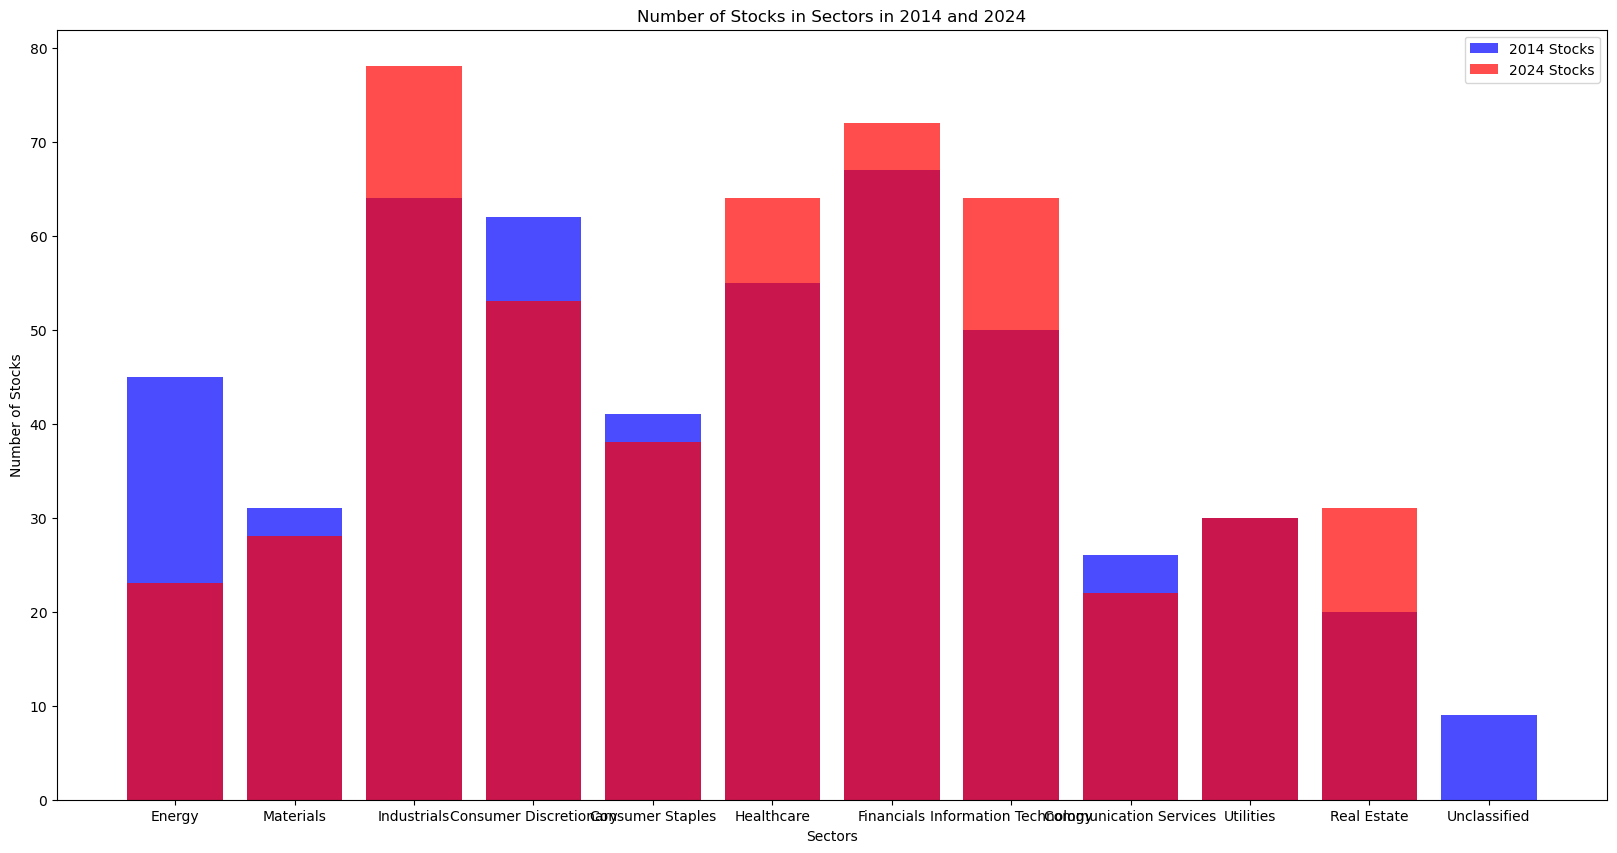

In [854]:
plt.figure(figsize=(20, 10))
plt.bar(sector_df['Sectors'], sector_df['2014 Stocks'], color='b', alpha=0.7, label='2014 Stocks')
plt.bar(sector_df['Sectors'], sector_df['2024 Stocks'], color='r', alpha=0.7, label='2024 Stocks')
plt.xlabel('Sectors')
plt.ylabel('Number of Stocks')
plt.title('Number of Stocks in Sectors in 2014 and 2024')
plt.legend()
plt.show()

In [855]:
industry_df_2014 = pd.DataFrame.from_dict(no_of_stocks_industry_2014, orient='index', columns=['2014 Stocks'])
industry_df_2024 = pd.DataFrame.from_dict(no_of_stocks_industry_2024, orient='index', columns=['2024 Stocks'])
industry_sector = pd.DataFrame.from_dict(gics_industries, orient='index', columns=['Industries'])

industry_df = pd.concat([industry_sector, industry_df_2014, industry_df_2024], axis=1).sort_index()
industry_df.fillna(0, inplace=True)
industry_df.index.name = 'GICS Code'

industry_df

,Industries,2014 Stocks,2024 Stocks
GICS Code,,,
101010,Energy Equipment & Services,13.00,3.00
101020,"Oil, Gas & Consumable Fuels",32.00,20.00
151010,Chemicals,16.00,16.00
151020,Construction Materials,1.00,2.00
151030,Containers & Packaging,7.00,6.00
151040,Metals & Mining,7.00,4.00
151050,Paper & Forest Products,0.00,0.00
201010,Aerospace & Defense,12.00,12.00
201020,Building Products,4.00,7.00


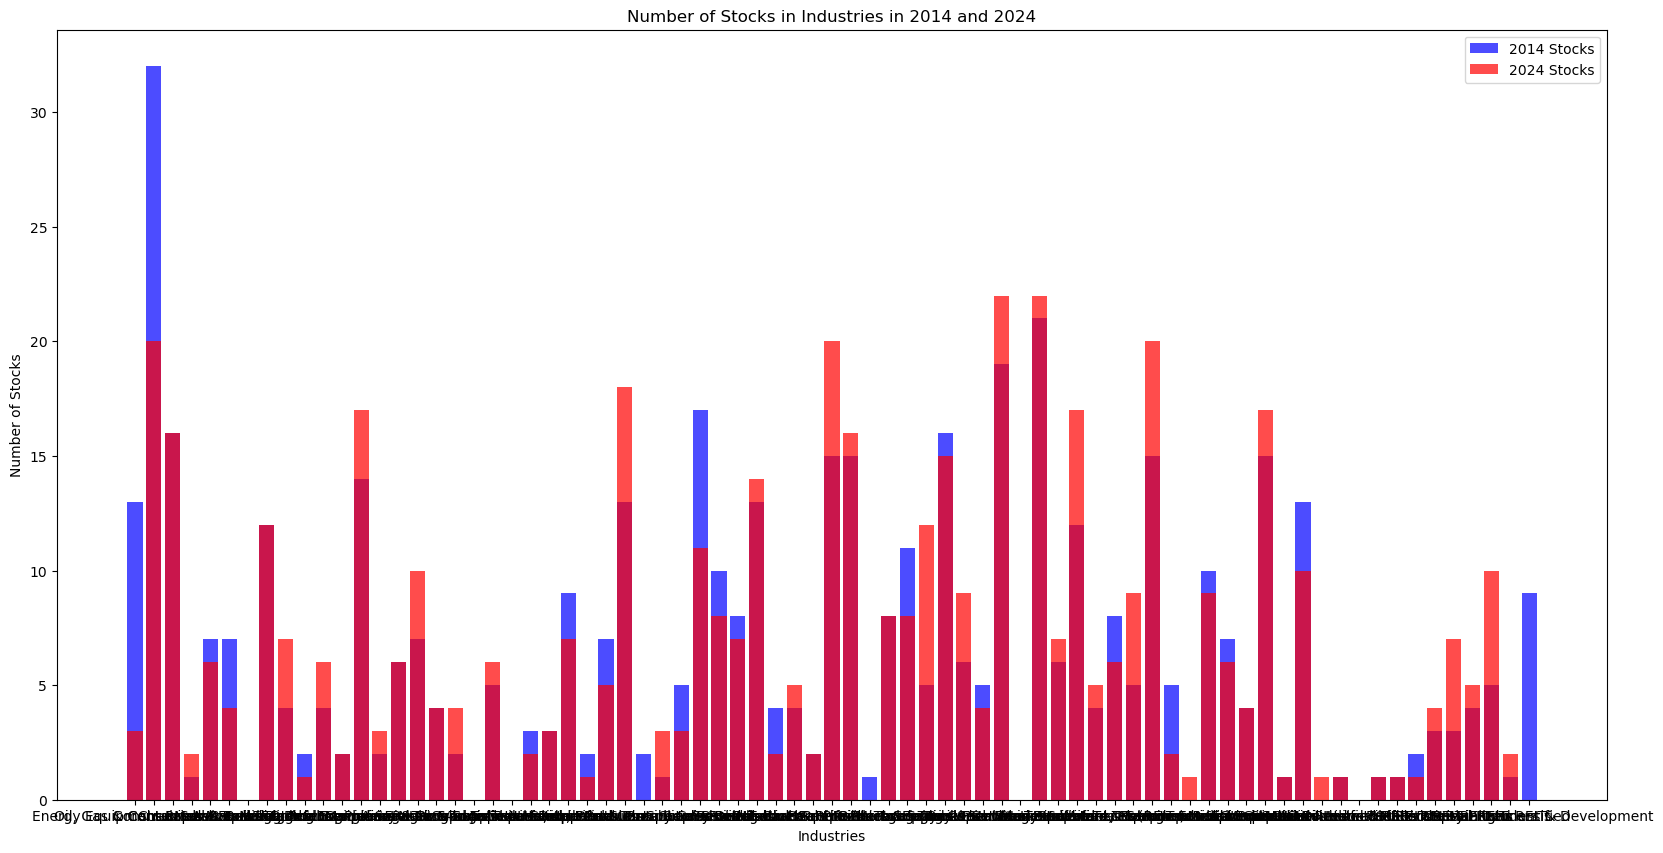

In [856]:
plt.figure(figsize=(20, 10))
plt.bar(industry_df['Industries'], industry_df['2014 Stocks'], color='b', alpha=0.7, label='2014 Stocks')
plt.bar(industry_df['Industries'], industry_df['2024 Stocks'], color='r', alpha=0.7, label='2024 Stocks')
plt.xlabel('Industries')
plt.ylabel('Number of Stocks')
plt.title('Number of Stocks in Industries in 2014 and 2024')
plt.legend()
plt.show()

In [857]:
def get_market_cap(df_market_cap, df_universe, df_tickers, date):
    year = date.year
    market_cap_sector = {}
    market_cap_industry = {}
    for ticker in df_universe.columns:
        if df_universe.loc[year, ticker] == 1:
            sector = get_sector(df_tickers.loc[ticker, 'gics_code'])
            industry = get_industry(df_tickers.loc[ticker, 'gics_code'])
            market_cap = df_market_cap.loc[date, ticker]
            if sector in market_cap_sector:
                market_cap_sector[sector] += market_cap
            else:
                market_cap_sector[sector] = market_cap
            if industry in market_cap_industry:
                market_cap_industry[industry] += market_cap
            else:
                market_cap_industry[industry] = market_cap
    return market_cap_sector, market_cap_industry

In [858]:
market_cap_sector_2014, market_cap_industry_2014 = get_market_cap(df_market_cap, df_universe, df_tickers, dt.datetime(2014, 1, 2))
market_cap_sector_2024, market_cap_industry_2024 = get_market_cap(df_market_cap, df_universe, df_tickers, dt.datetime(2024, 1, 2))


sectors_df_2014 = pd.DataFrame.from_dict(market_cap_sector_2014, orient='index', columns=['2014 Market Cap'])
sectors_df_2024 = pd.DataFrame.from_dict(market_cap_sector_2024, orient='index', columns=['2024 Market Cap'])
sector_df = pd.DataFrame.from_dict(gics_sectors, orient='index', columns=['Sectors'])

sector_df_2014 = pd.concat([sector_df, sectors_df_2014], axis=1).sort_index()
sector_df_2024 = pd.concat([sector_df, sectors_df_2024], axis=1).sort_index()

sector_df_2014.index.name = 'GICS Code'
sector_df_2014.fillna(0, inplace=True)

sector_df_2024.index.name = 'GICS Code'
sector_df_2024.fillna(0, inplace=True)

sector_df_2014

,Sectors,2014 Market Cap
GICS Code,,
10,Energy,1714223.14
15,Materials,592968.53
20,Industrials,1851276.05
25,Consumer Discretionary,1505581.21
30,Consumer Staples,1787059.53
35,Healthcare,2259201.38
40,Financials,2783578.09
45,Information Technology,2318796.19
50,Communication Services,1595571.07


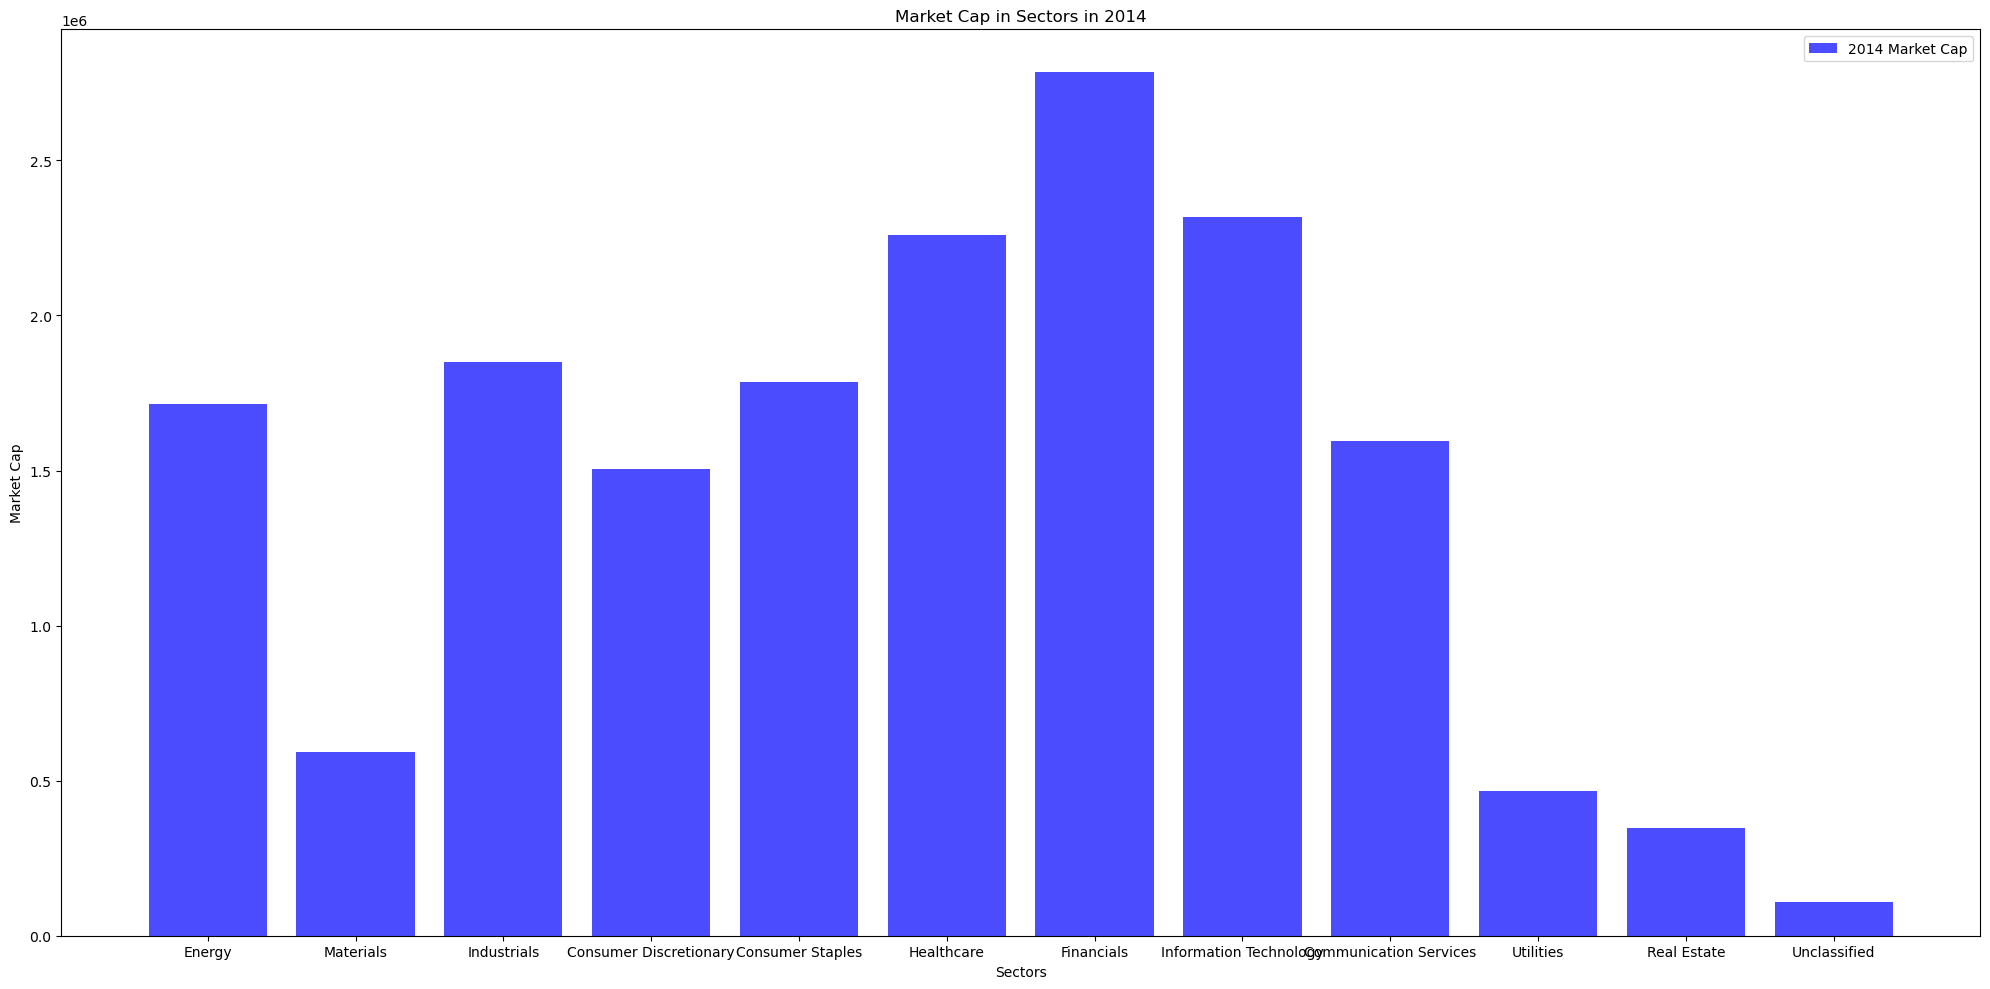

In [ ]:
plt.figure(figsize=(25, 12))
plt.bar(sector_df_2014['Sectors'], sector_df_2014['2014 Market Cap'], color='b', alpha=0.7, label='2014 Market Cap')
plt.xlabel('Sectors')
plt.ylabel('Market Cap')
plt.title('Market Cap in Sectors in 2014')
plt.tight_layout()
plt.legend()

In [860]:
sector_df_2024

,Sectors,2024 Market Cap
GICS Code,,
10,Energy,1617214.10
15,Materials,983547.43
20,Industrials,3648384.26
25,Consumer Discretionary,4720285.12
30,Consumer Staples,2856263.47
35,Healthcare,5312223.66
40,Financials,5644229.94
45,Information Technology,11628815.50
50,Communication Services,5669719.60


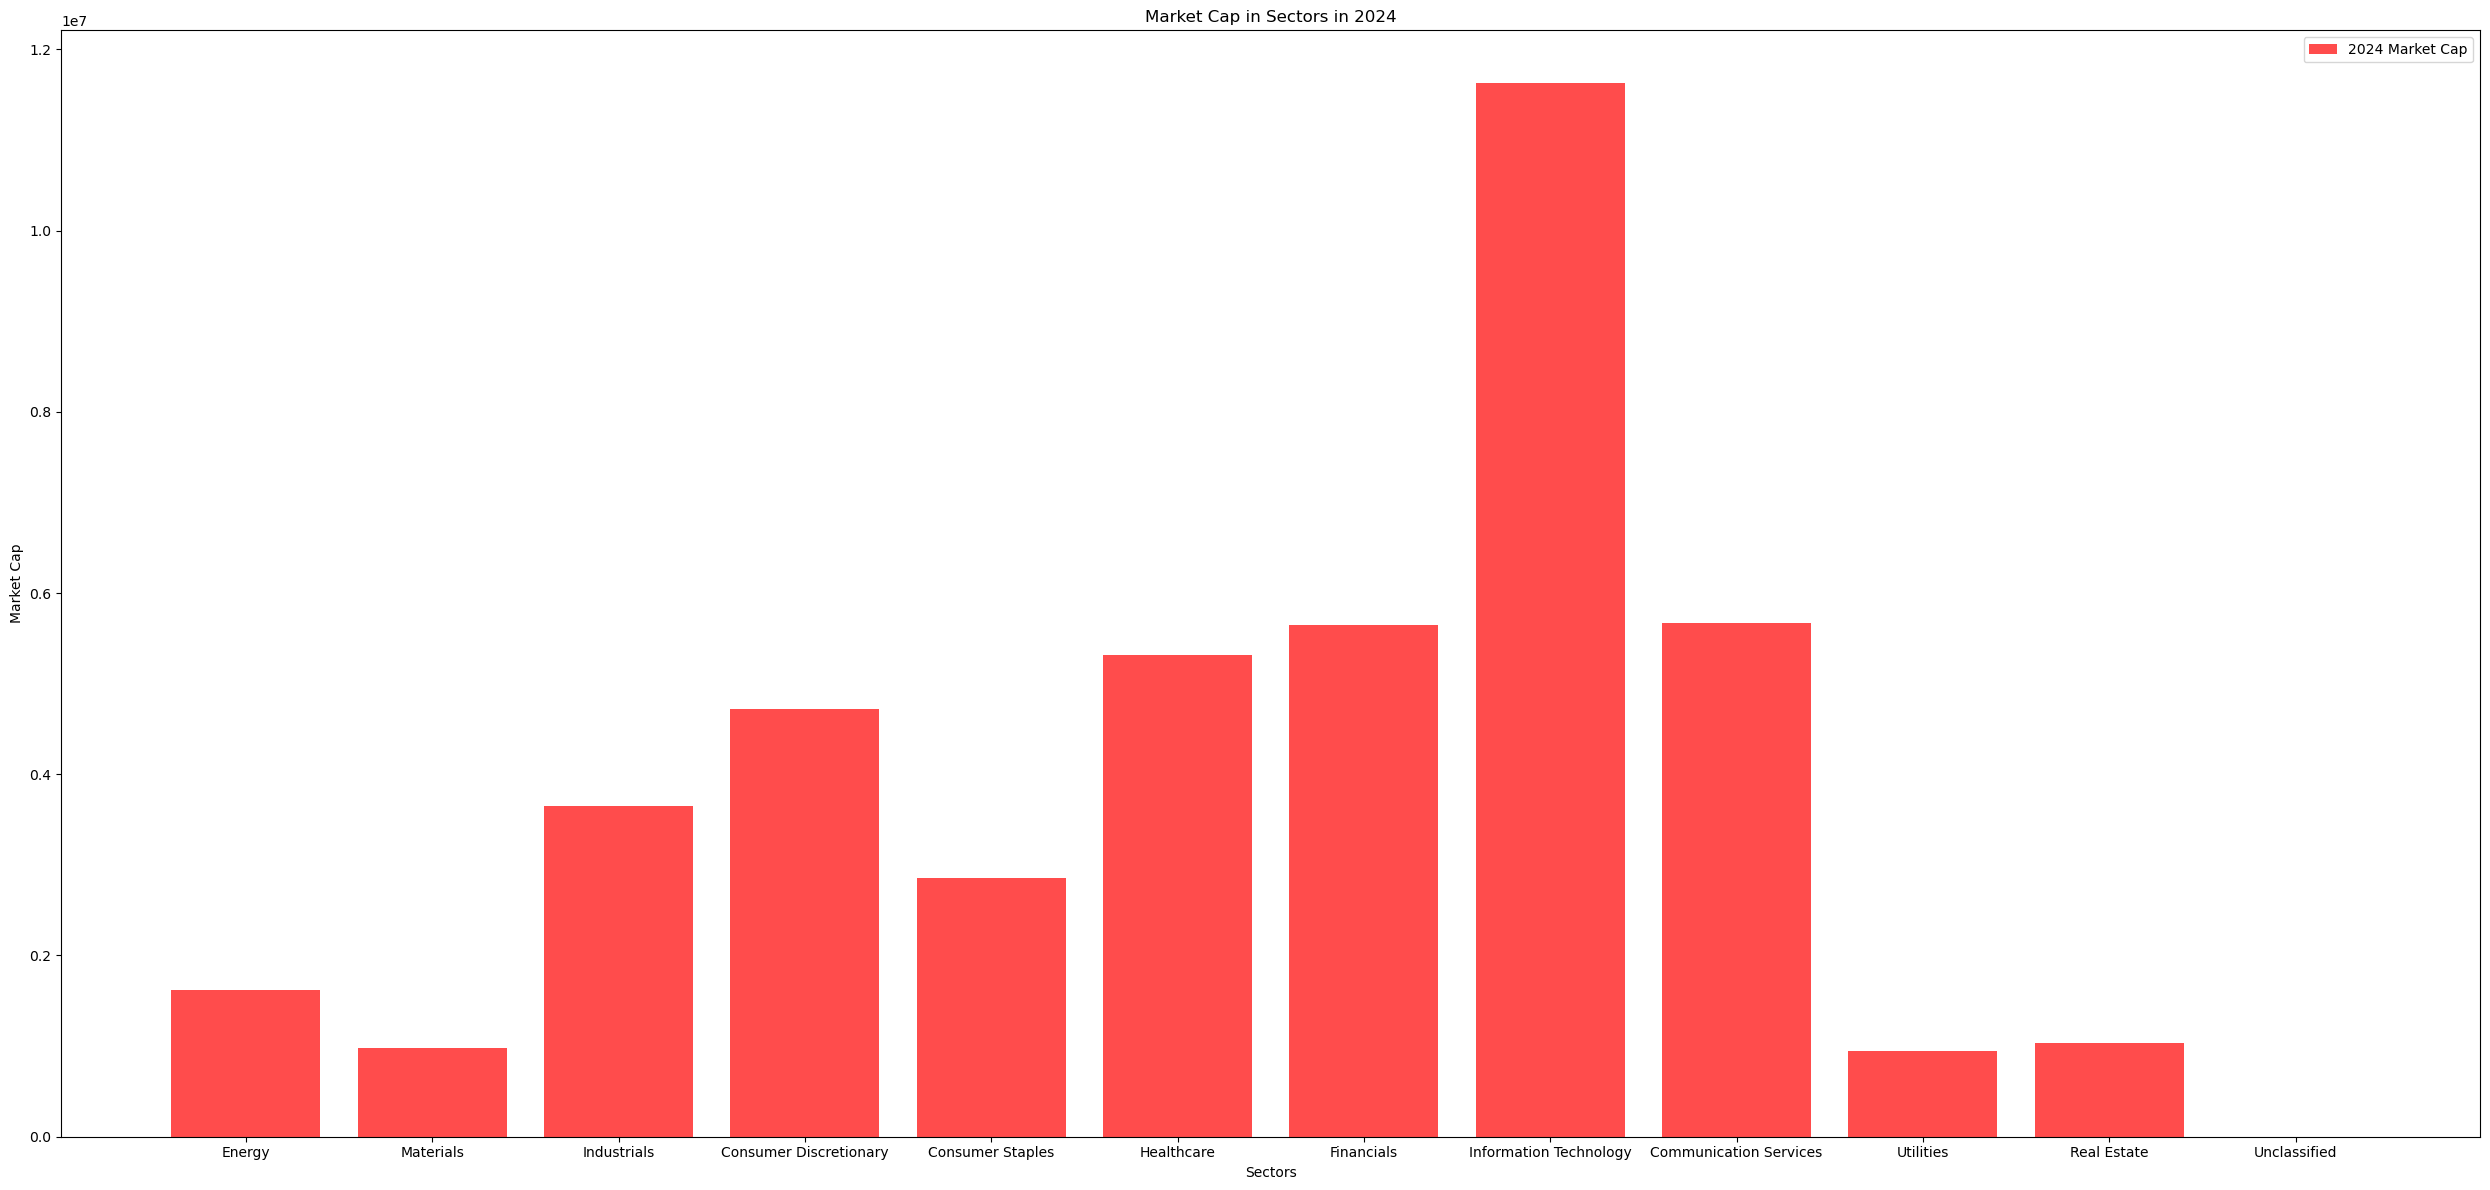

In [884]:
plt.figure(figsize=(25, 12))
plt.bar(sector_df_2024['Sectors'], sector_df_2024['2024 Market Cap'], color='r', alpha=0.7, label='2024 Market Cap')
plt.xlabel('Sectors')
plt.ylabel('Market Cap')
plt.title('Market Cap in Sectors in 2024')
plt.tight_layout()
plt.legend()

In [862]:
industries_df_2014 = pd.DataFrame.from_dict(market_cap_industry_2014, orient='index', columns=['2014 Market Cap'])
industries_df_2024 = pd.DataFrame.from_dict(market_cap_industry_2024, orient='index', columns=['2024 Market Cap'])
industry_sector = pd.DataFrame.from_dict(gics_industries, orient='index', columns=['Industries'])

industry_df_2014 = pd.concat([industry_sector, industries_df_2014], axis=1).sort_index()
industry_df_2014.index.name = 'GICS Code'
industry_df_2014.fillna(0, inplace=True)

industry_df_2024 = pd.concat([industry_sector, industries_df_2024], axis=1).sort_index()
industry_df_2024.index.name = 'GICS Code'
industry_df_2024.fillna(0, inplace=True)

industry_df_2014

,Industries,2014 Market Cap
GICS Code,,
101010,Energy Equipment & Services,309275.32
101020,"Oil, Gas & Consumable Fuels",1404947.82
151010,Chemicals,437059.87
151020,Construction Materials,7627.78
151030,Containers & Packaging,57084.06
151040,Metals & Mining,91196.81
151050,Paper & Forest Products,0.00
201010,Aerospace & Defense,693070.52
201020,Building Products,48860.80


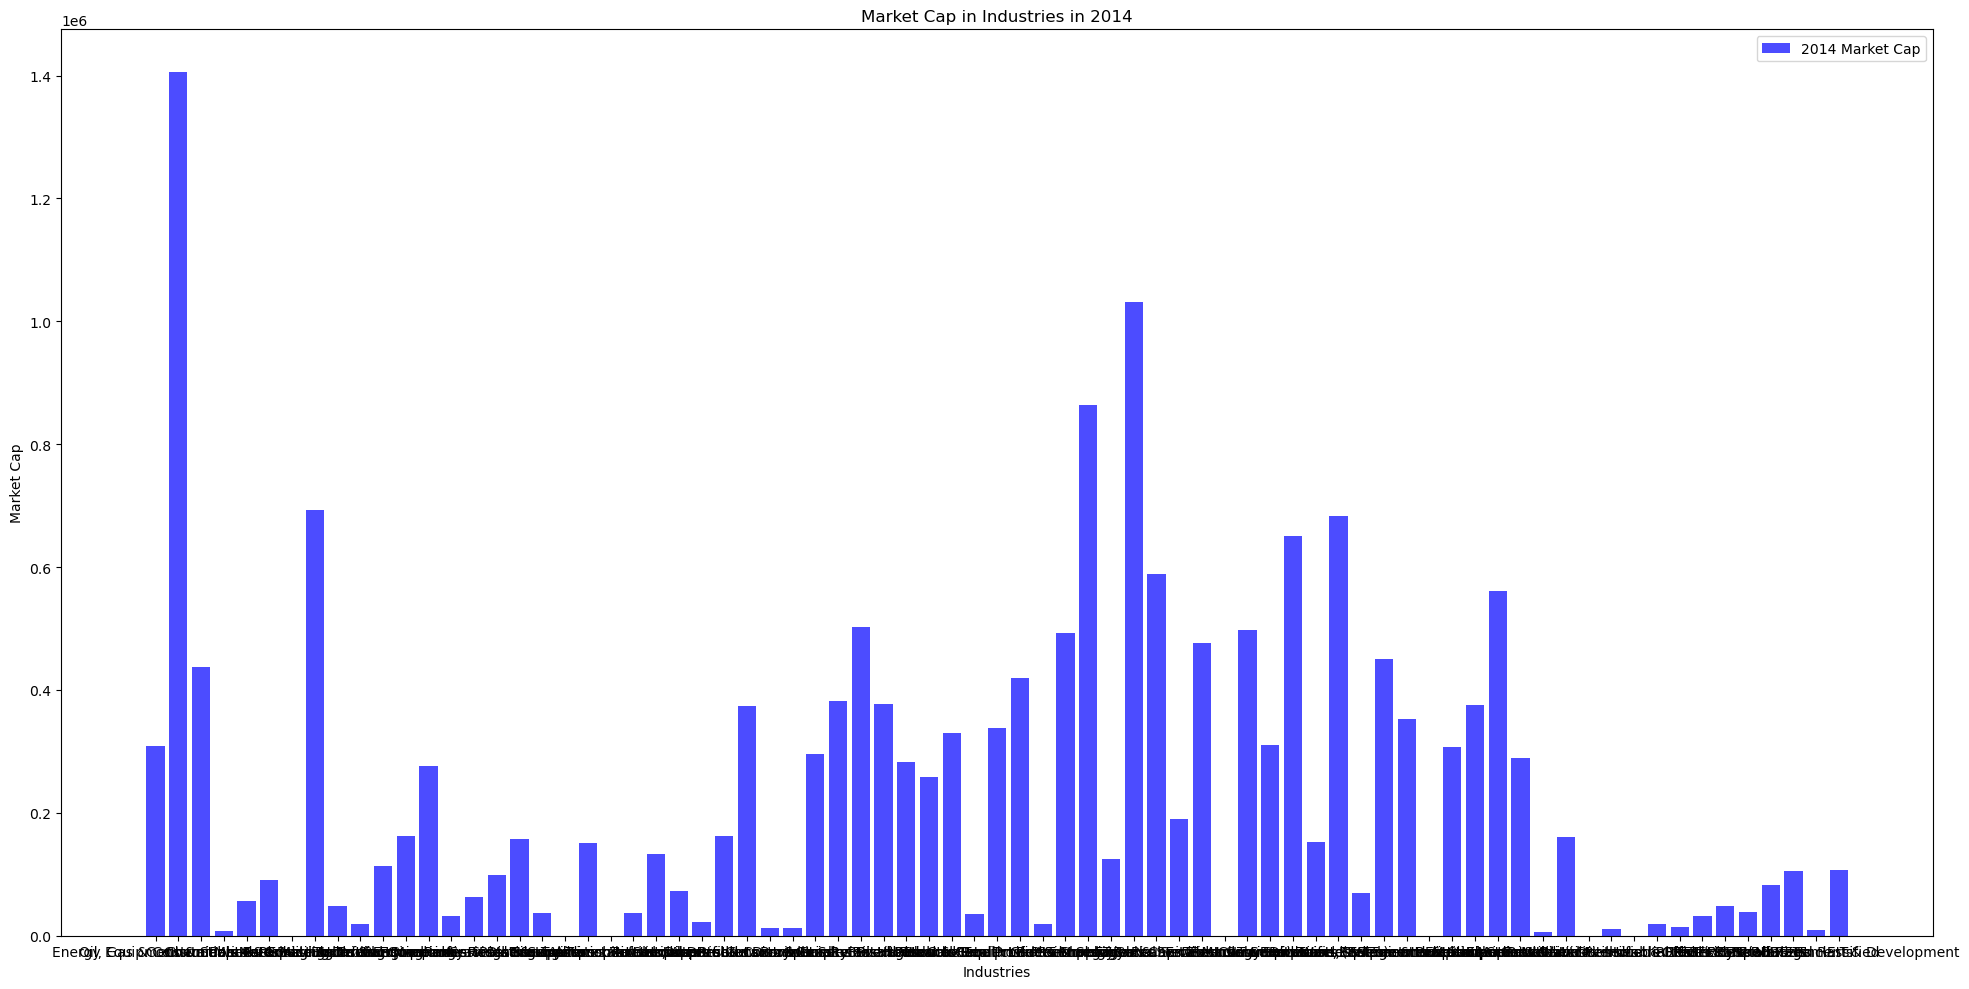

In [886]:
plt.figure(figsize=(20, 10))
plt.bar(industry_df_2014['Industries'], industry_df_2014['2014 Market Cap'], color='b', alpha=0.7, label='2014 Market Cap')
plt.xlabel('Industries')
plt.ylabel('Market Cap')
plt.title('Market Cap in Industries in 2014')
plt.tight_layout()
plt.legend()
plt.show()

In [864]:
industry_df_2024

,Industries,2024 Market Cap
GICS Code,,
101010,Energy Equipment & Services,140460.19
101020,"Oil, Gas & Consumable Fuels",1476753.91
151010,Chemicals,667427.46
151020,Construction Materials,60059.66
151030,Containers & Packaging,86186.61
151040,Metals & Mining,169873.70
151050,Paper & Forest Products,0.00
201010,Aerospace & Defense,828269.36
201020,Building Products,202646.07


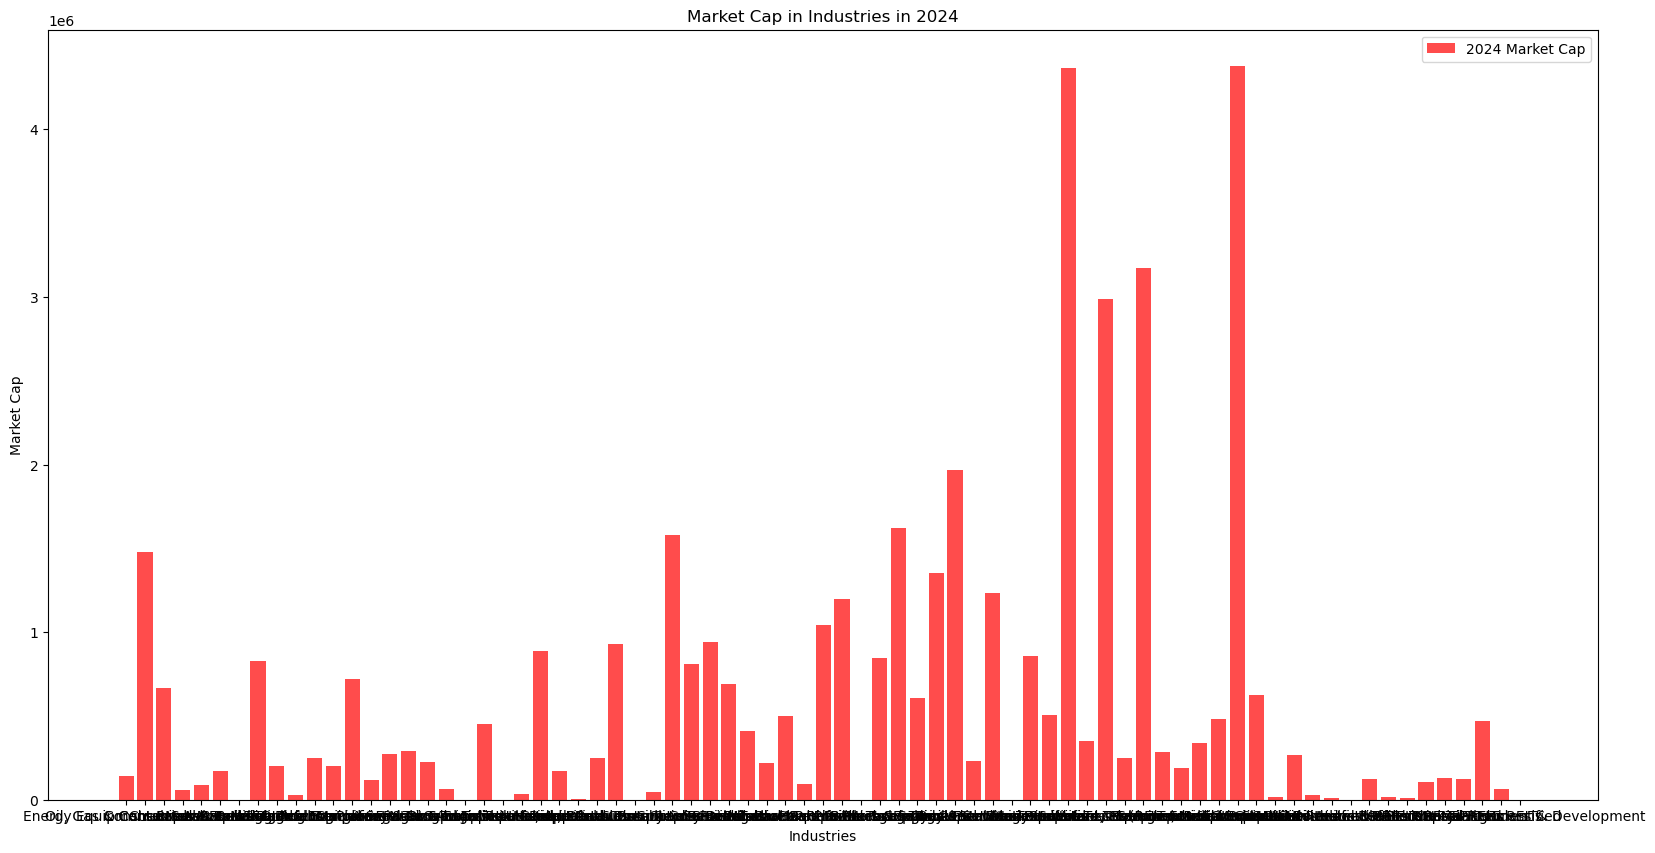

In [865]:
plt.figure(figsize=(20, 10))
plt.bar(industry_df_2024['Industries'], industry_df_2024['2024 Market Cap'], color='r', alpha=0.7, label='2024 Market Cap')
plt.xlabel('Industries')
plt.ylabel('Market Cap')
plt.title('Market Cap in Industries in 2024')
plt.legend()
plt.tight_layout()
plt.show()

In [866]:
# select top 3 sectors by market cap
top_sectors_2014 = sector_df_2014.nlargest(3, '2014 Market Cap')
top_sectors_2024 = sector_df_2024.nlargest(3, '2024 Market Cap')

top_sectors_2014

,Sectors,2014 Market Cap
GICS Code,,
40,Financials,2783578.09
45,Information Technology,2318796.19
35,Healthcare,2259201.38


In [867]:
top_sectors_2024

,Sectors,2024 Market Cap
GICS Code,,
45,Information Technology,11628815.50
50,Communication Services,5669719.60
40,Financials,5644229.94


In [868]:
# select top 3 industries by market cap
top_industries_2014 = industry_df_2014.nlargest(3, '2014 Market Cap')
top_industries_2024 = industry_df_2024.nlargest(3, '2024 Market Cap')

top_industries_2014

,Industries,2014 Market Cap
GICS Code,,
101020,"Oil, Gas & Consumable Fuels",1404947.82
401010,Banks,1031024.23
352020,Pharmaceuticals,863815.60


In [869]:
top_industries_2024

,Industries,2024 Market Cap
GICS Code,,
502030,Interactive Media & Services,4375614.83
451030,Software,4364983.24
453010,Semiconductors & Semiconductor Equipment,3171491.26


In [870]:
nvda_gics_code = df_tickers.loc['NVDA']['gics_code']

nvda_industry = get_industry(nvda_gics_code)

In [871]:
nvda_industry_stocks = []

for ticker in df_universe.columns:
    if df_universe.loc[2024][ticker]:
        try:
            gics_code = df_tickers.loc[ticker]['gics_code']
        except:
            gics_code = 'na'
        
        industry = get_industry(gics_code)
        
        if industry == nvda_industry:
            nvda_industry_stocks.append(ticker)

nvda_industry_stocks

['ADI',
 'AMAT',
 'AMD',
 'AVGO',
 'ENPH',
 'FSLR',
 'INTC',
 'KLAC',
 'LRCX',
 'MCHP',
 'MPWR',
 'MU',
 'NVDA',
 'NXPI',
 'ON',
 'QCOM',
 'QRVO',
 'SWKS',
 'TER',
 'TXN']

In [872]:
df_stocks_close = pd.read_csv('data_us/close.csv')
df_stocks_close['Date'] = pd.to_datetime(df_stocks_close['Date'], format = '%Y%m%d')
df_stocks_close.set_index('Date', inplace=True)

start_date = '2019-12-31'
end_date = '2024-12-31'

df_stocks_close = df_stocks_close.loc[start_date:end_date]

df_nvda_industry_close = df_stocks_close[nvda_industry_stocks]

df_nvda_industry_close.head()

,ADI,AMAT,AMD,AVGO,ENPH,FSLR,INTC,KLAC,LRCX,MCHP,MPWR,MU,NVDA,NXPI,ON,QCOM,QRVO,SWKS,TER,TXN
Date,,,,,,,,,,,,,,,,,,,,
2019-12-31,118.84,61.04,45.86,316.02,26.13,55.96,59.85,178.17,292.40,104.72,178.02,53.78,235.30,127.26,24.38,88.23,116.23,120.88,68.19,128.29
2020-01-02,120.43,62.20,49.10,322.39,29.34,57.24,60.84,182.57,297.89,107.60,180.01,55.39,239.91,128.54,25.06,88.69,115.96,121.67,69.68,129.57
2020-01-03,118.31,61.21,48.60,314.19,29.29,57.02,60.10,179.08,294.69,105.24,176.75,54.53,236.07,127.30,24.69,87.02,112.34,118.65,68.23,127.85
2020-01-06,116.92,59.89,48.39,313.72,29.66,55.83,59.93,175.05,289.19,103.73,174.94,53.56,237.06,126.40,24.07,86.51,111.64,116.56,66.75,126.96
2020-01-07,119.58,61.62,48.25,312.64,29.99,56.67,58.93,176.44,296.24,110.69,176.57,58.27,239.93,128.04,24.66,88.97,111.23,117.67,68.22,129.41


In [873]:
df_nvda_industry_returns = df_nvda_industry_close.pct_change().dropna()

df_nvda_industry_returns.head()

,ADI,AMAT,AMD,AVGO,ENPH,FSLR,INTC,KLAC,LRCX,MCHP,MPWR,MU,NVDA,NXPI,ON,QCOM,QRVO,SWKS,TER,TXN
Date,,,,,,,,,,,,,,,,,,,,
2020-01-02,0.01,0.02,0.07,0.02,0.12,0.02,0.02,0.02,0.02,0.03,0.01,0.03,0.02,0.01,0.03,0.01,-0.00,0.01,0.02,0.01
2020-01-03,-0.02,-0.02,-0.01,-0.03,-0.00,-0.00,-0.01,-0.02,-0.01,-0.02,-0.02,-0.02,-0.02,-0.01,-0.01,-0.02,-0.03,-0.02,-0.02,-0.01
2020-01-06,-0.01,-0.02,-0.00,-0.00,0.01,-0.02,-0.00,-0.02,-0.02,-0.01,-0.01,-0.02,0.00,-0.01,-0.03,-0.01,-0.01,-0.02,-0.02,-0.01
2020-01-07,0.02,0.03,-0.00,-0.00,0.01,0.02,-0.02,0.01,0.02,0.07,0.01,0.09,0.01,0.01,0.02,0.03,-0.00,0.01,0.02,0.02
2020-01-08,0.01,-0.00,-0.01,-0.01,0.03,0.00,0.00,0.00,0.01,-0.01,-0.00,-0.01,0.00,0.00,0.01,-0.00,0.02,0.02,0.00,0.00


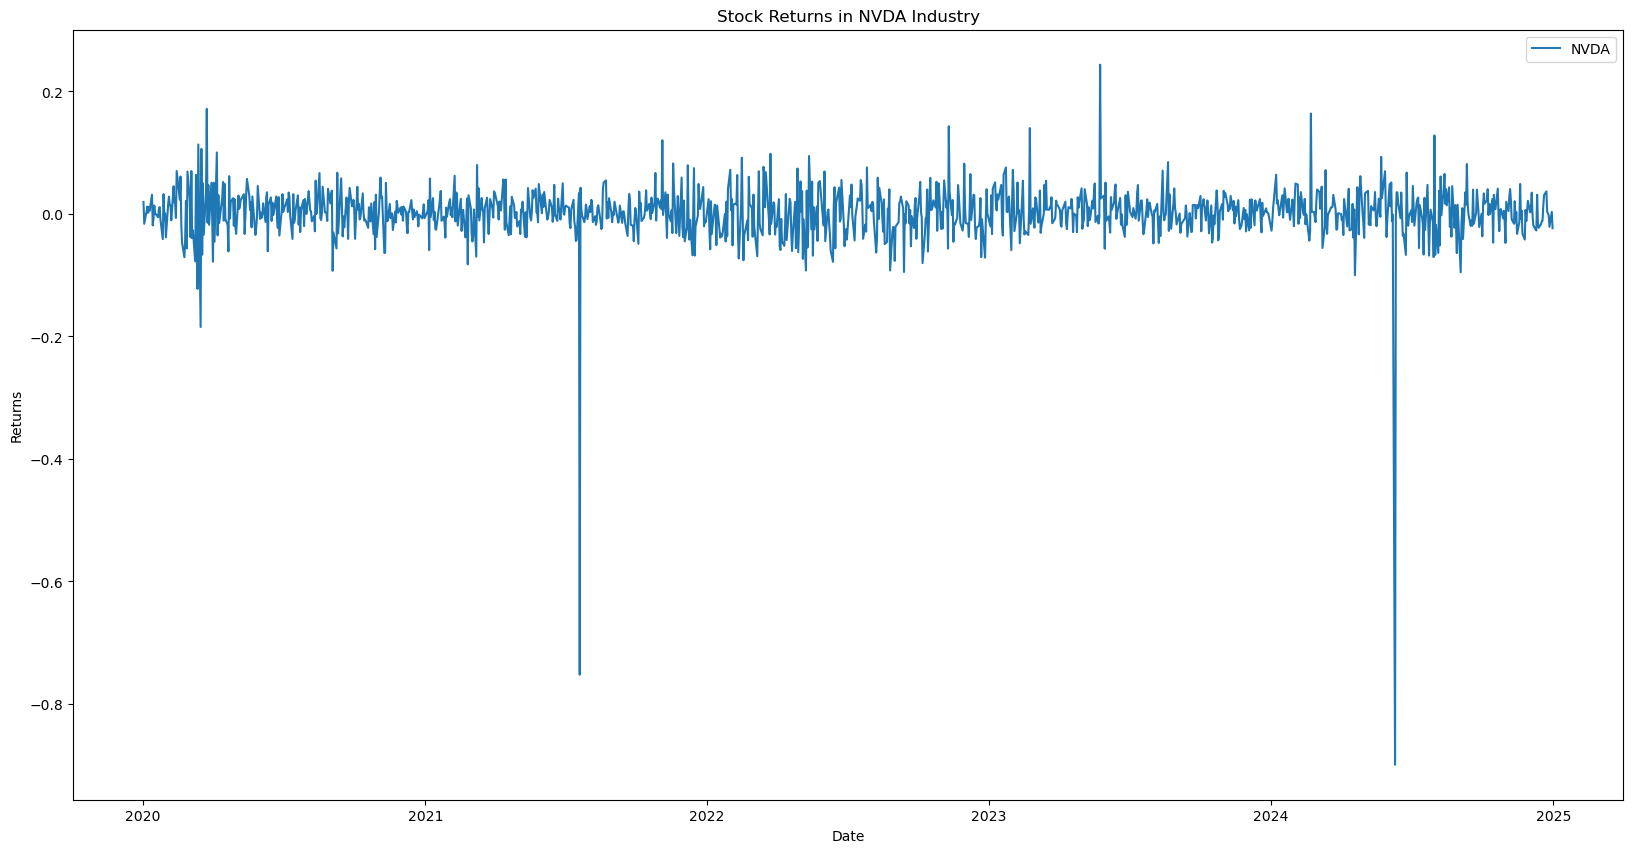

In [874]:
plt.figure(figsize=(20, 10))
plt.plot(df_nvda_industry_returns.index, df_nvda_industry_returns['NVDA'], label='NVDA')
plt.xlabel('Date')
plt.ylabel('Returns')
plt.title('NVDA Stock Returns')
plt.legend()
plt.show()

In [875]:
df_nvda_industry_log_returns = np.log(1 + df_nvda_industry_returns)

df_nvda_industry_log_returns_industry = df_nvda_industry_log_returns.mean(axis = 1)

df_nvda_industry_log_returns.head()

,ADI,AMAT,AMD,AVGO,ENPH,FSLR,INTC,KLAC,LRCX,MCHP,MPWR,MU,NVDA,NXPI,ON,QCOM,QRVO,SWKS,TER,TXN
Date,,,,,,,,,,,,,,,,,,,,
2020-01-02,0.01,0.02,0.07,0.02,0.12,0.02,0.02,0.02,0.02,0.03,0.01,0.03,0.02,0.01,0.03,0.01,-0.00,0.01,0.02,0.01
2020-01-03,-0.02,-0.02,-0.01,-0.03,-0.00,-0.00,-0.01,-0.02,-0.01,-0.02,-0.02,-0.02,-0.02,-0.01,-0.01,-0.02,-0.03,-0.03,-0.02,-0.01
2020-01-06,-0.01,-0.02,-0.00,-0.00,0.01,-0.02,-0.00,-0.02,-0.02,-0.01,-0.01,-0.02,0.00,-0.01,-0.03,-0.01,-0.01,-0.02,-0.02,-0.01
2020-01-07,0.02,0.03,-0.00,-0.00,0.01,0.01,-0.02,0.01,0.02,0.06,0.01,0.08,0.01,0.01,0.02,0.03,-0.00,0.01,0.02,0.02
2020-01-08,0.01,-0.00,-0.01,-0.01,0.03,0.00,0.00,0.00,0.01,-0.01,-0.00,-0.01,0.00,0.00,0.01,-0.00,0.02,0.02,0.00,0.00


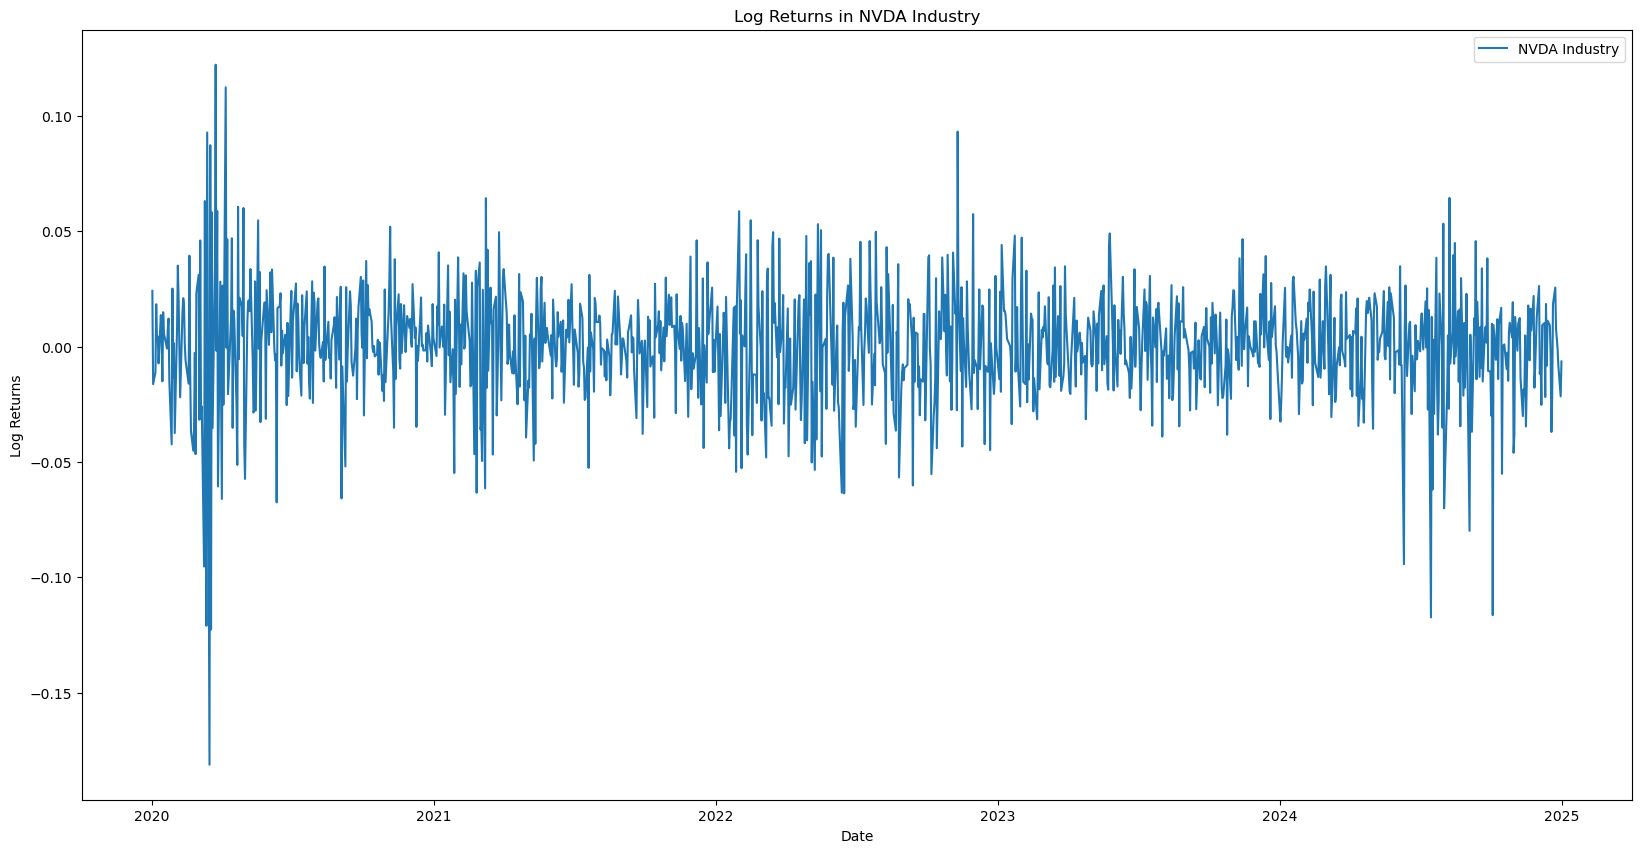

In [876]:
plt.figure(figsize=(20, 10))
plt.plot(df_nvda_industry_log_returns_industry.index, df_nvda_industry_log_returns_industry, label='NVDA Industry')
plt.xlabel('Date')
plt.ylabel('Log Returns')
plt.title('Log Returns in NVDA Industry')
plt.legend()
plt.show()

In [877]:
X = sm.add_constant(df_nvda_industry_log_returns_industry)

model = sm.OLS(df_nvda_industry_log_returns['NVDA'], X).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   NVDA   R-squared:                       0.181
Model:                            OLS   Adj. R-squared:                  0.180
Method:                 Least Squares   F-statistic:                     277.2
Date:                Mon, 27 Jan 2025   Prob (F-statistic):           2.18e-56
Time:                        22:12:48   Log-Likelihood:                 1472.7
No. Observations:                1258   AIC:                            -2941.
Df Residuals:                    1256   BIC:                            -2931.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0008      0.002     -0.365      0.7

In [878]:
start_date = '2020-01-02'
end_date = '2024-12-31'

df_market_cap_nvda_industry = df_market_cap.loc[start_date:end_date][nvda_industry_stocks]

df_weighted_returns = df_market_cap_nvda_industry*df_nvda_industry_returns

df_weighted_returns = df_weighted_returns.sum(axis=1)/df_market_cap_nvda_industry.sum(axis=1)

df_weighted_returns = df_weighted_returns.to_frame(name='Weighted Returns')

df_weighted_returns.head()

,Weighted Returns
Date,
2020-01-02,0.02
2020-01-03,-0.02
2020-01-06,-0.01
2020-01-07,0.01
2020-01-08,-0.00


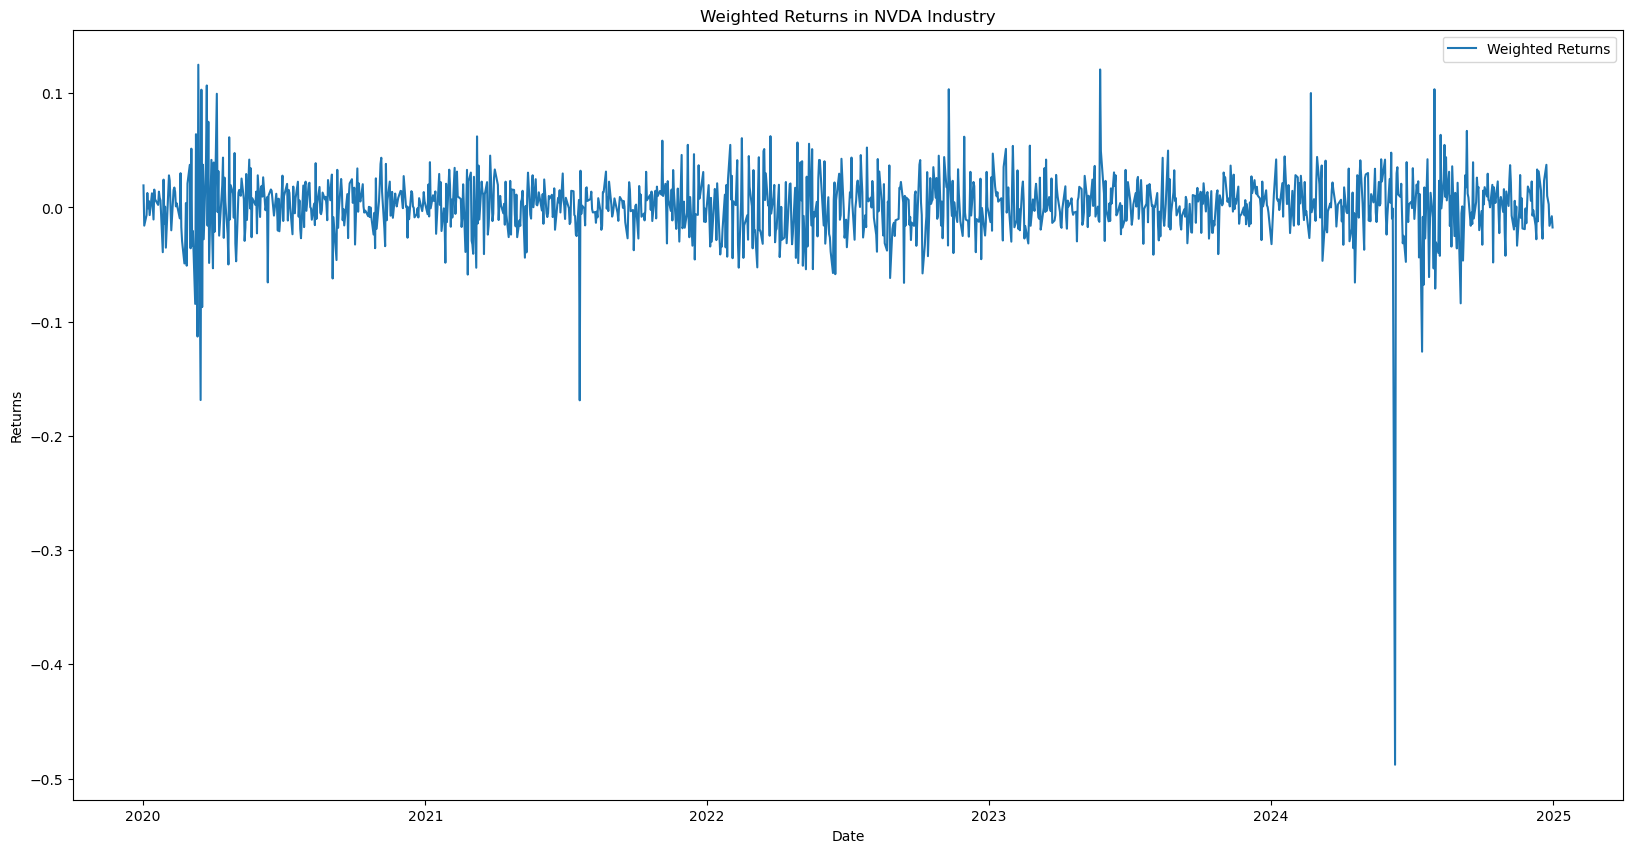

In [879]:
plt.figure(figsize=(20, 10))
plt.plot(df_weighted_returns.index, df_weighted_returns['Weighted Returns'], label='Weighted Returns')
plt.xlabel('Date')
plt.ylabel('Returns')
plt.title('Weighted Returns in NVDA Industry')
plt.legend()
plt.show()

In [880]:
X = sm.add_constant(df_weighted_returns['Weighted Returns'])

Y = df_nvda_industry_log_returns['NVDA']

model = sm.OLS(Y, X).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   NVDA   R-squared:                       0.589
Model:                            OLS   Adj. R-squared:                  0.589
Method:                 Least Squares   F-statistic:                     1802.
Date:                Mon, 27 Jan 2025   Prob (F-statistic):          5.44e-245
Time:                        22:12:49   Log-Likelihood:                 1907.0
No. Observations:                1258   AIC:                            -3810.
Df Residuals:                    1256   BIC:                            -3800.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.0030      0.002  